<a href="https://colab.research.google.com/github/armacintosh/Tutorials/blob/main/GTheoryPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalizability Theory in R 
[article walkthrough](https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1337&context=pare)

Citation: Huebner, A. & Lucht, M. (2019). Generalizability Theory in R. Practical Assessment, Research & Evaluation, 24(5).
Available online: http://pareonline.net/getvn.asp?v=24&n=5 

## Facets
if a sample of people are administered a set of items that are graded by different raters on multiple occasions, then items, raters, and occasions would all be considered facets in the study. 

## Designs
Facets are crossed or nested. 

*   In a **crossed** design, all conditions of one facet are observed in all conditions of every other facet. For example, in a crossed one-facet design with items as the only facet, every person is measured on each item, as this
is referred to as a *p x i* design.

*   There are designs in which facets are **nested** within one another. 
For example, if the single-facet scenario described above was modified
so that each person was administered a unique set of
items (rather than all persons receiving the same items),
then items would be nested in persons. This design is
referred to as a *𝑖:p*.

*   An example of a nested design with two facets is the *p x (i:o)* design, in which all persons answer the same items, but the items
are different on each occasion.


## G studies 
ordinarily involve estimating the variance of the measurements, which is decomposed into the variance of the components. This information allows the researcher to identify the sources contributing the greatest variability to the
measurements.

## D studies 
The D study is used to identify the optimal number of conditions of each facet in order to maximize reliability. The D study variance components can be
derived from the G study variance components listed in Table 1 by dividing the G study components by the proposed number of facets.

The D study also involves the computation of two reliability coefficients:

1.   generalizability - 𝑬𝜌^2
2.   index of dependability - 𝛷







# Get packages

In [ ]:
install.packages('gtheory')
library(gtheory)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’


Loading required package: lme4

Loading required package: Matrix



# Read in Data 

In [ ]:
#Read in the pi_dat data:
Person <- as.factor(rep(1:6,each = 4))
Item <- as.factor(rep(1:4,times = 6))
Score <- c(9,9,7,4,9,8,4,6,8,8,6,2,
 9,8,6,3,10,9,8,7,6,4,5,1)
pi_dat <- data.frame(Person,Item,Score)

# Read in the pio_cross_dat data:
Person <- as.factor(rep(1:6,each = 8))
Occasion <- as.factor(rep(1:2,each = 4,times = 6))
Item <- as.factor(rep(1:4,times = 12))
Score <- c(9,9,7,4,9,8,5,5,9,8,4,6,
 6,5,3,3,8,8,6,2,8,7,3,2,
 9,8,6,3,9,6,6,2,10,9,8,7,
 8,8,9,7,6,4,5,1,3,2,3,2)
pio_cross_dat <- data.frame(Person,Item,Score,Occasion)

# Read in the pio_nest_dat data:
Person <- as.factor(rep(1:6,each = 4))
Occasion <- as.factor(rep(1:2,each = 2,times = 6))
Item <- as.factor(rep(1:4,times = 6))
Score <- c(9,9,5,5,9,8,3,3,8,8,3,2,
 9,8,6,2,10,9,9,7,6,4,3,2)
pio_nest_dat <- data.frame(Person,Item,Score,Occasion) 

#**Crossed designs**
---

## Single Facet Design
First, an ANOVA analysis is conducted on the data in order to determine the DF, SS, and MS for the data, shown in columns two through four of Table 3, where 𝛼 denotes a generic effect. 

In [ ]:
summary(aov(Score~Person+Item, data = pi_dat))

            Df Sum Sq Mean Sq F value   Pr(>F)    
Person       5  44.50   8.900   6.965  0.00151 ** 
Item         3  76.33  25.444  19.913 1.73e-05 ***
Residuals   15  19.17   1.278                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

For G-study, the model must be specified for the formula argument; for the one-facet 𝑝x𝑖 crossed design, the formula is written as follows:
Note, The gtheory package is essentially a wrapper for lme4.

In [ ]:
formula1 <- Score ~ (1|Person)+(1|Item)

This formula is passed as an argument to the gstudy() function to determine
the variance component estimates and the percentage of total variation for each term.

variance components estimates and percentage of the total variation, are
displayed in the fifth and sixth columns of Table 3. This portion of Table 3 may be obtained by typing g1$components. 

In [ ]:
g1 <- gstudy(data = pi_dat, formula1)
g1$components

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person,1.905558,26.4,1
Item,4.027814,55.9,1
Residual,1.277775,17.7,1


A D study can be performed by using the dstudy() function with the same formula.

The object of measurement is always the person or group being measured, and the score is the numeric value of the measured variable. For this example, the results of the dstudy() function are stored in the variable d1.


In [ ]:
d1 <- dstudy(g1,colname.objects="Person", colname.scores="Score", data= pi_dat)

d1$components

d1$var.universe # universe score variance
d1$var.error.rel # relative error variance
d1$generalizability # g coefficient
d1$dependability # dependability coefficient

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person,1.9055579,59.0,1
Item,1.0069535,31.2,4
Residual,0.3194438,9.9,4


[1] 1.905558

[1] 0.3194438

[1] 0.8564299

[1] 0.5895991

To get estimates for different number of conditions

It is important to note that as the value of 𝑛_i increases, the generalizability and dependability increase.

In [ ]:
# number of conditions 
n_i <- c(1,2,5,10)

#relative error variance
rel_err_var <- g1$components[3,2]/n_i

#absolute error variance
abs_err_var <-
g1$components[2,2]/n_i+g1$components[3,
2]/n_i

#calculate generalizability coefficient
gen_coef <-
g1$components[1,2]/(g1$components[1,2]
+ rel_err_var)

#calculate dependability coefficient
dep_coef <-
g1$components[1,2]/(g1$components[1,2]
+ abs_err_var)
round(rel_err_var,2)
round(abs_err_var,2)
round(gen_coef,2)
round(dep_coef,2) 

[1] 1.28 0.64 0.26 0.13

[1] 5.31 2.65 1.06 0.53

[1] 0.60 0.75 0.88 0.94

[1] 0.26 0.42 0.64 0.78

##Two Facet Deisgn

The variance in a two-facet *p x i x o* design can be attributed to the seven variance components as shown in Table 1.

In [ ]:
summary(aov(Score~Person*Item*Occasion, data = pio_cross_dat))

                     Df Sum Sq Mean Sq
Person                5 112.94   22.59
Item                  3 117.90   39.30
Occasion              1  15.19   15.19
Person:Item          15  35.48    2.37
Person:Occasion       5   5.94    1.19
Item:Occasion         3   2.90    0.97
Person:Item:Occasion 15  12.48    0.83

Then, for the G study, the formula reflects the two-facet *p x i x o* crossed design.

It is important to note that the interaction term for 𝑝𝑖𝑜 is not included because this is the error term for this design.

In [ ]:
formula2 <- Score ~(1|Person)+(1|Item)+(1|Occasion) + (1|Person:Item) + (1|Person:Occasion) + (1|Occasion:Item)
g2 <- gstudy(data = pio_cross_dat,formula2)
g2$components

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person:Item,0.76665688,9.8,1
Person:Occasion,0.08889285,1.1,1
Occasion:Item,0.02227409,0.3,1
Person,2.48374310,31.7,1
Item,3.06732106,39.1,1
Occasion,0.57787462,7.4,1
Residual,0.83186863,10.6,1


Then, the D study results are obtained similarly to the previous example

In [ ]:
d2 <- dstudy(g2,colname.objects="Person", colname.scores="Score",data=pio_cross_dat)
d2

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person:Item,0.191664219,4.9,4
Person:Occasion,0.044446425,1.1,2
Occasion:Item,0.002784261,0.1,8
Person,2.483743102,64.0,1
Item,0.766830266,19.8,4
Occasion,0.288937312,7.4,2
Residual,0.103983578,2.7,8


Alternative values of n_i and n_o can be determined by

In [ ]:
n_i <- c(1,2,3,4,5)
n_o <- c(1,2,3,3,3)

#relative error variance
rel_err_var <- g2$components[1,2]/n_i + g2$components[2,2] / n_o +g2$components[7,2]/(n_i*n_o)

#calculate generalizability coefficient
gen_coef <- g2$components[4,2]/(g2$components[4,2] + rel_err_var) 

round(rel_err_var,2) 
round(gen_coef,2)

[1] 1.69 0.64 0.38 0.29 0.24

[1] 0.60 0.80 0.87 0.90 0.91

# Nested designs


---


##Single Facet Design

In one-facet 𝒊:𝒑 designs, when heteroskedasticity is present, the variance of the estimated regression coefficients becomes the following. 

Note, the nested facet follows the forward slash, and this ensures this component is included in the residual. For this simple example, this produces the same results as when the Item facet is excluded from the formula since the 𝑝𝑖 interaction is part of the residual.


In [ ]:
summary(aov(Score~(Person/Item),data = pi_dat)) 

            Df Sum Sq Mean Sq
Person       5   44.5   8.900
Person:Item 18   95.5   5.306

In [ ]:
formula3 <- Score ~ (1|Person) 
g3 <- gstudy(data = pi_dat, formula3) 
g3

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person,0.8986111,14.5,1
Residual,5.3055556,85.5,1


##Two Facet Design

Two-facet p x (i:o) design. 
Notice that the nested syntax is once again used in the aov() function; Item
follows the forward slash because it is nested within Occasion. We see the same syntax for nesting Item within Occasion in the G-study.

In [ ]:
summary(aov(Score~Person*(Occasion/Item), data = pio_nest_dat))

                     Df Sum Sq Mean Sq
Person                5  56.88   11.38
Occasion              1  92.04   92.04
Occasion:Item         2   7.42    3.71
Person:Occasion       5  13.21    2.64
Person:Occasion:Item 10   7.08    0.71

The estimated variance components and percent of total variation are shown in columns below. 

In [ ]:
formula4 <- Score ~ (1|Person)+(1|Person:Occasion)+ (1|Occasion/Item)
g4 <- gstudy(data = pio_nest_dat, formula4) 
g4


source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person:Occasion,0.9666216,8.4,1
Person,2.1834142,18.9,1
Item:Occasion,0.5000032,4.3,1
Occasion,7.1986931,62.3,1
Residual,0.7083468,6.1,1


In [ ]:
d4 <- dstudy(g4, colname.objects="Person", colname.scores="Score", data = pio_nest_dat) 
d4

source,var,percent,n
<chr>,<dbl>,<dbl>,<dbl>
Person:Occasion,0.4833108,7.4,2
Person,2.1834142,33.2,1
Item:Occasion,0.1250008,1.9,4
Occasion,3.5993465,54.8,2
Residual,0.1770867,2.7,4


See Table 11 in the [article](https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1337&context=pare) Two-facet nested designs and their formulas.

# Plotting


In [ ]:
n_prime <- 1:25

#relative error variance
rel_err_var <- g1$components[3,2]/n_prime

#absolute error variance
abs_err_var <- g1$components[2,2]/n_prime + g1$components[3,2]/n_prime

#calculate generalizability coefficient
gen_coef <- g1$components[1,2]/(g1$components[1,2] + rel_err_var)

#calculate dependability coefficient
dep_coef <- g1$components[1,2]/(g1$components[1,2] + abs_err_var)

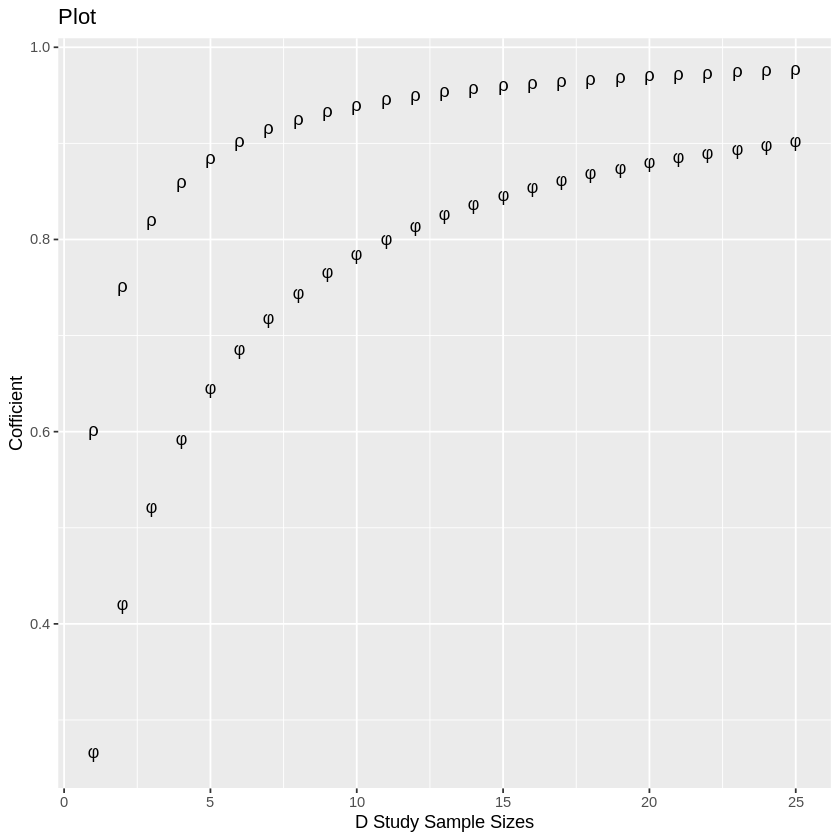

In [ ]:
library(ggplot2)
label1 <- "rho"
label2 <- "phi"

ggplot(data.frame(x=n_prime,y=gen_coef, label=label1)) +
geom_text(aes(n_prime,gen_coef,label=label1), parse=TRUE) +
geom_text(aes(n_prime,dep_coef,label=label2), parse=TRUE) +
ggtitle("Plot") + xlab("D Study Sample Sizes") + ylab("Cofficient")

# Formatting the data - long not wide

The data sets here are formatted in “long” form, which is required by the functions in the gtheory package. In contrast, many times G-theory example data sets (as well as data for other reliability methods such as the intra-class correlation coefficient) are arranged in “wide” form.

In this case, the Item variable is moved from being one column for each item score (wide) to item number being its own column and score being another column (long).

The code below creates the wide form version (To run the example, make sure to have the original pio_cross_dat read in first):

In [ ]:
library(tidyr)
pio_cross_dat_wide <- spread(pio_cross_dat,Item,Score)
pio_cross_dat_wide

Person,Occasion,1,2,3,4
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9,9,7,4
1,2,9,8,5,5
2,1,9,8,4,6
2,2,6,5,3,3
3,1,8,8,6,2
3,2,8,7,3,2
4,1,9,8,6,3
4,2,9,6,6,2
5,1,10,9,8,7


And now back to long format (what you actually need)

In [ ]:
gather(pio_cross_dat_wide, key=Item, value=Score,'1','2','3','4', factor_key = TRUE) 

Person,Occasion,Item,Score
<fct>,<fct>,<fct>,<dbl>
1,1,1,9
1,2,1,9
2,1,1,9
2,2,1,6
3,1,1,8
3,2,1,8
4,1,1,9
4,2,1,9
5,1,1,10
